# Data Analysis for mushroom dataset

Mushrooms Dataset. A famous—if slightly moldy—dataset about mushrooms can be found in the UCI repository here: https://archive.ics.uci.edu/ml/datasets/Mushroom. The fact that this is such a well-known dataset in the data science community makes it a good dataset to use for comparative benchmarking. For example, if someone was working to build a better decision tree algorithm (or other predictive classifier) to analyze categorical data, this dataset could be useful. A typical problem (which is beyond the scope of this assignment!) is to answer the question, “Which other attribute or attributes are the best predictors of whether a particular mushroom is poisonous or edible?”

# Environment set up

In [ ]:
#loading required libraries
library(tidyverse)

In [ ]:
library(curl)

# Data Acquisition

In [ ]:
#data import from the source itself (uci.edu)
mush_data_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
get_mush_data <- curl(mush_data_url)
#data acquisition using url supported functions and storing in a data frame
mushroom <- read.csv(get_mush_data, header = TRUE, sep = ',', stringsAsFactors = F)
#view the data frame
head(mushroom)

In [ ]:
#view dimensions of data frame
# number of observations = 8123
# number of variables (features or attributes) = 23
# please note that first attiribute is class (label)
dim(mushroom)

In [ ]:
#variable names (features or attributes)
colnames(mushroom)

# Data Wrangling

In [ ]:
# Analyzed the provided data dictionary and renamee the columns per attribute names
mush_df <- rename(mushroom,class=p,cap_shape=x,cap_surface=s,cap_color=n,bruises=t,odor=p.1,gill_attachment=f,gill_spacing=c,gill_size=n.1,gill_color=k,stalk_shape=e,stalk_root=e.1,stalk_surface_above_ring=s.1,stalk_surface_below_ring=s.2,stalk_color_above_ring=w,stalk_color_below_ring=w.1,veil_type=p.2,veil_color=w.2,ring_number=o,ring_type=p.3,spore_print_color=k.1,population=s.3,habitat=u)

#checking dimensions
dim(mush_df)

In [ ]:
# view the new mush_df dataset
head(mush_df)

In [ ]:
#confirming the columns names in the new mush_df dataset
colnames(mush_df)

In [ ]:
#using head parameters to view the first 10 observations
head(mush_df,10)

In [ ]:
#creating the subset of mush_df by selecting only few attributes (randomly picked)
mush_subset <- select(mush_df,class,cap_shape,veil_color,population,habitat)

#view first 10 observations of new subset which we just created
head(mush_subset,10)

In [ ]:
#using mutate function to substitiute values of attributes in each cell according to provided attribute inforamtion for each observation
mush_df_val <- mutate(mush_subset, class = case_when(class=='e'~'edible',class=='p'~'poisonous'),cap_shape=case_when(cap_shape=='b'~'bell',cap_shape=='c'~'conical',cap_shape=='f'~'flat',cap_shape=='x'~'convex',cap_shape=='k'~'knobbed',cap_shape=='s'~'sunken'),veil_color=case_when(veil_color=='n'~'brown',veil_color=='o'~'orange',veil_color=='w'~'white',veil_color=='y'~'yellow'),population=case_when(population=='a'~'abundant',population=='c'~'clustered',population=='n'~'numerous',population=='s'~'scattered',population=='v'~'several', population=='y'~'solitary'),habitat=case_when(habitat=='g'~'grasses',habitat=='l'~'leaves',habitat=='m'~'meadows',habitat=='p'~'paths',habitat=='u'~'urban',habitat=='w'~'waste', habitat=='d'~'woods'))

#checking dimensions and making sure that no observation is lost after the data transformation
dim(mush_df_val)

In [ ]:
#view firt 10 observation of transformed subset
head(mush_df_val,10)

In [ ]:
#view data frame details using str function
str(mush_df_val)

In [ ]:
#summarize the dataset using count
summarize(mush_df_val,n=n())

In [ ]:
sum(mush_df_val$class=='edible')

In [ ]:
sum(mush_df_val$class=='poisonous')

In [ ]:
#class distribution - edible
ed_class <- sum(mush_df_val$class=='edible')/nrow(mush_df_val)
ed_cls_dist <- ed_class*100
sprintf('Edible Class : %.1f%%',ed_class*100)

In [ ]:
#class distribution - edible
pos_class <- sum(mush_df_val$class=='poisonous')/nrow(mush_df_val)
pos_cls_dist <- pos_class*100
pos_cls_dist

In [ ]:
print(sprintf('Poisonous Class : %.1f%%',pos_cls_dist))

In [ ]:
mush_df_val %>%
 group_by(habitat) %>%
 summarize(pop_sd=sd(as.numeric(as.factor(population)))) %>%
 arrange(desc(pop_sd)) 

In [ ]:
#Checking if there are any duplicate observation in the datasert
count(mush_df_val[duplicated(mush_df),])

In [ ]:
#find counts for class & population and also view the relatioships
count(mush_df_val,class,population)

In [ ]:
#check for NAs not available values present in the dataset
table(is.na(mush_df))

In [ ]:
#But we know from the data dictionary that there are missing values for attribute#11
#let's replace ? with NA and check the dataset
data.st.na <- mutate(mush_df,stalk_root=ifelse(stalk_root=='?',NA,stalk_root))

table(is.na(data.st.na))

In [ ]:
#drill further
count(data.st.na,stalk_root)

In [ ]:
#checl dimensions
dim(data.st.na)

In [ ]:
#now drop NA values from the dataset
data.mush.new <- drop_na(data.st.na)

#now check new dataset without NA's (NA observations got dropped)
dim(data.mush.new)

In [ ]:
#number of NAs got dropped
8123-5643

# Explore Further…

In [ ]:
#finding relationships between habitat and cap color
data.ht.cc <- select(data.mush.new, class,habitat,population,cap_color)
filter(data.ht.cc, habitat=='l', cap_color=='w')

# It turns out that all observations : habitat with ‘leaves’ and cap color ‘white’ are posionous and have ‘cluster’ population

In [ ]:
#let's try some aggregate habitat with group by and summarize with class 
datahc <-mush_df_val %>%
 group_by(habitat) %>%
 summarize(count=n(),n_distinct(class)) #%>%

#in the result dataset 1 indicates edible and 2 indicates poisonous (R takes care of it)
datahc

In [ ]:
# from above result dataset , it apears that waste habitat is the only edible class
# let's try to find more in the transformed dataset
data.hb.waste <-filter(mush_df_val, habitat=='waste')
# the population for such combination appears clusterd
count(data.hb.waste, class, habitat, population)

In [ ]:
data.hb.cl <-filter(mush_df_val, habitat!='waste',class=='edible')
sum(data.hb.cl$class=='edible')

In [ ]:
sum(mush_df_val$class=='edible')

In [ ]:
#matches the above calculated count 192
sum(mush_df_val$class=='edible') - sum(data.hb.cl$class=='edible')

In [ ]:
# let's see how spread or data distibution between habitat and population
mush_df_val %>%
 group_by(habitat) %>%
 summarize(pop_sd=sd(as.numeric(as.factor(population)))) %>%
 arrange(desc(pop_sd)) 

In [ ]:
#another use of group by and summarize
mush_df_val %>%
 group_by(class) %>%
 summarize(count=n())

In [ ]:
#total observations with group by
mush_df_val %>%
 summarize(count=n())

In [ ]:
##   count
## 1  8123

# EDA (Exploratory Data Analysis)
Bar Plots

In [ ]:
#Mushroom Population and habitat
ggplot(mush_df_val, mapping = aes(mush_df_val$population))+
    geom_bar(aes(fill=mush_df_val$habitat))+
    xlab('Mushroom population')+labs(fill='habitat')+geom_text(stat='count',aes(label = ..count..,y=..count..),vjust=-0.2)+
    ggtitle('Mushroom Population and habitat')

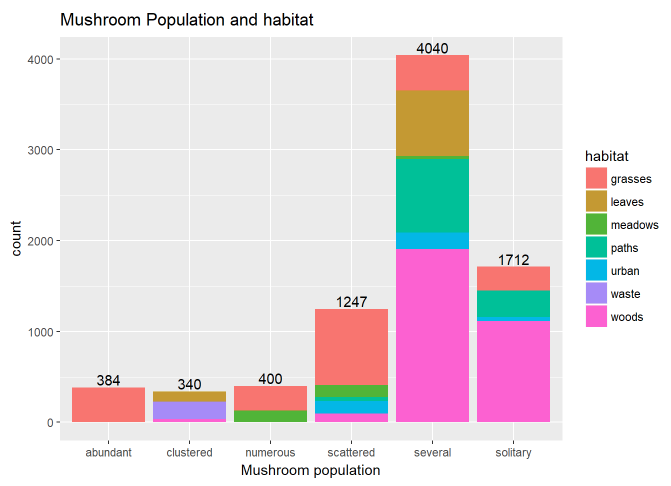

In [ ]:
#Mushroom habitat and class
ggplot(mush_df_val, mapping = aes(mush_df_val$habitat))+
    geom_bar(aes(fill=mush_df_val$class))+
    xlab('Mushroom habitat')+labs(fill='class')+geom_text(stat='count',aes(label = ..count..,y=..count..),vjust=-0.2)+
    ggtitle('Mushroom habitat and class')

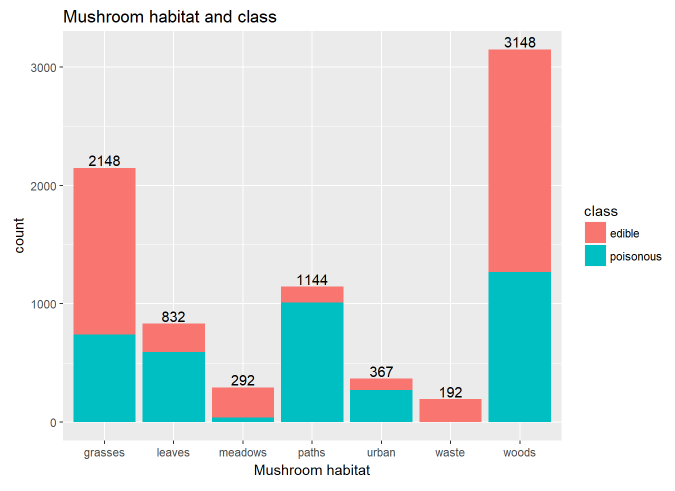

# Density Plots

In [5]:
#another use of group by and summarize
mush_df_val %>%
 group_by(class) %>%
 summarize(count=n())

SyntaxError: invalid syntax (2642938299.py, line 2)

In [ ]:
#density plot with habitat and class
ggplot(data=mush_df_val, aes(habitat,colour=class))+
    geom_density(alpha=0.1)

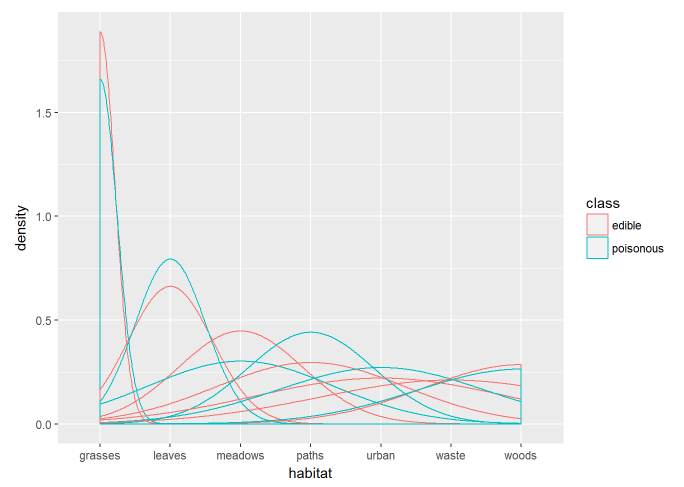

In [ ]:
#density plot with population and class using fill
ggplot(data=mush_df_val, aes(population,colour=class,fill=population))+
    geom_density(alpha=0.1)

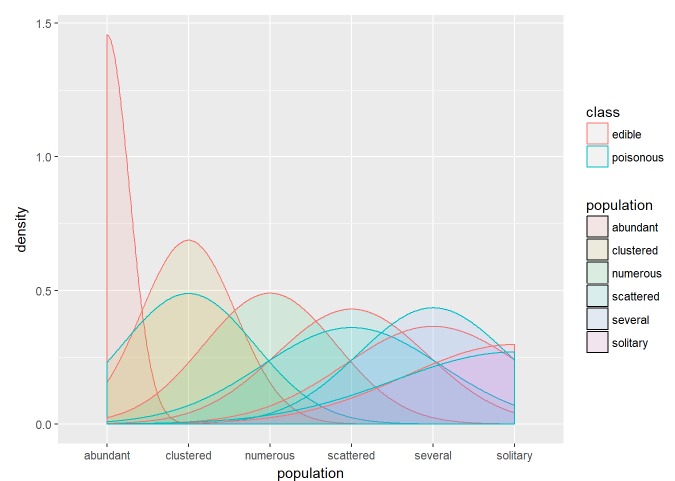